In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from pprint import pprint
import seaborn as sns

In [26]:
patient_data = pd.read_csv('PatientData.csv')

# **(Q1)** You decide to fit a 2D Bayesian classifier to your data, where $x = [T_ {RR}]$, SICK is the 'positive' class, and we assume that $p(x|0₁) ~ N(μι, Σ₁)$. Use unbiased estimators to estimate the 2D mean and covariance matrix for each class-conditional distribution. Report your two estimated mean vectors and covariance matrices.


---



## Q1 Answer:

$$\mathrm{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$

For the covariance, an unbiased estimator adjusts the denominator from n to n-1. This adjustment corrects for the bias that arises when estimating population variance or covariance from a sample.

In [27]:

# Separate data into two classes: Healthy and Sick
healthy_data = patient_data[patient_data['Patient_Status'] == 'HEALTHY'][['T', 'RR']]
sick_data = patient_data[patient_data['Patient_Status'] == 'SICK'][['T', 'RR']]

# Calculate the unbiased estimators for mean and covariance for each class
mean_healthy = healthy_data.mean().values
cov_healthy = healthy_data.cov().values
mean_sick = sick_data.mean().values
cov_sick = sick_data.cov().values

print("Unbiased Estimators for Healthy Class:")
print("Mean:", mean_healthy)
print("Covariance Matrix:\n", cov_healthy)

print("\nUnbiased Estimators for Sick Class:")
print("Mean:", mean_sick)
print("Covariance Matrix:\n", cov_sick)

Unbiased Estimators for Healthy Class:
Mean: [36.77292777 20.03604645]
Covariance Matrix:
 [[ 2.11598617e+00 -2.32805447e-04]
 [-2.32805447e-04  2.97857263e-01]]

Unbiased Estimators for Sick Class:
Mean: [38.39730213 21.97277948]
Covariance Matrix:
 [[3.36436875 0.08317142]
 [0.08317142 0.79046862]]





---


🔽

---

# (Q2) Based on historical effluent testing data, we know that approximately 20% of guests will have MF. Use Bayes' theorem to compute the posterior probability that a patient with a temperature of 37.5 degrees and a respiration rate of 26 is sick (numeric answer, show equation).


---



## Q2 Answer:


**Bayes' Theorem**


$$P(w_1 | x) = \frac{P(x|w_1)P(w_1)}{P(x)}$$

Where:
* $P(w_1 | x)$ is the posterior probability that the patient is **SICK** given the observed data $x$.
* $P(x|w_1)$ is the likelihood of observing the data $x$ given that the patient is **SICK**.
* $P(w_1)$ is the prior probability that a patient is **SICK**, which we know to be 20% (or 0.2).
* $P(x)$ is the evidence, which is the total probability of observing the data $x$.

The observed data $x$ is represented by:

$$x = [T, RR] = [37.5, 26]$$

We need to calculate the posterior probability $P(w_1 | x)$, where $w_1$ represents the **SICK** class.

The likelihood $p(x|w_1)$ is modeled as a bivariate normal (Gaussian) distribution.

$$p(x|w_1) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$

Where:

* $\mu$ is the mean vector for the **SICK** class.
* $\Sigma$ is the covariance matrix for the **SICK** class.
* $d$ is the dimensionality of the data (in this case, $d = 2$).
* $x$ is the observed data point.

We already have:

* Mean vector for **SICK**: $\mu_{SICK} = [38.40, 21.97]$
* Covariance matrix for **SICK**:

$$\Sigma_{SICK} = \begin{bmatrix} 3.364 & 0.083 \\ 0.083 & 0.790 \end{bmatrix}$$

In [28]:
from scipy.stats import multivariate_normal

#[T, RR]
x = np.array([37.5, 26])

mean_sick_vector = mean_sick
cov_sick_matrix = cov_sick

# Prior 'SICK'
from scipy.stats import multivariate_normal

#[T, RR]
x = np.array([37.5, 26])

mean_sick_vector = mean_sick
cov_sick_matrix = cov_sick

# Prior 'SICK'
P_sick = 0.2
likelihood_sick = multivariate_normal.pdf(x, mean=mean_sick_vector, cov=cov_sick_matrix)

print(f'Likelihood of observing the data x given that the patient is SICK:{likelihood_sick}')

Likelihood of observing the data x given that the patient is SICK:2.640732348188037e-06


The $p(x)$ is computed by considering both classes (**HEALTHY** and **SICK**):

$$p(x) = p(x|w_1)P(w_1) + p(x|w_0)P(w_0)$$

Where:

* $w_0$ represents the **HEALTHY** class.
* $P(w_0) = 1 - P(w_1) = 0.8$

In [29]:
mean_healthy_vector = mean_healthy
cov_healthy_matrix = cov_healthy

# Prior 'HEALTHY'
P_healthy = 0.8

likelihood_healthy = multivariate_normal.pdf(x, mean=mean_healthy_vector, cov=cov_healthy_matrix)
print("Likelihood of observing the data x given that the patient is HEALTHY:", likelihood_healthy)

#  p(x)
evidence = (likelihood_sick * P_sick) + (likelihood_healthy * P_healthy)
print("Evidence (total probability of observing the data x):", evidence)

Likelihood of observing the data x given that the patient is HEALTHY: 2.0719974466511435e-27
Evidence (total probability of observing the data x): 5.281464696376074e-07


Now, we can use Bayes' theorem to calculate the posterior probability that the patient is SICK:

$$P(w_1 | x) = \frac{P(x|w_1)P(w_1)}{P(x)}$$


In [30]:
posterior_sick = (likelihood_sick * P_sick) / evidence

print("Posterior Probability that the patient is SICK given the observed data x:", posterior_sick)

Posterior Probability that the patient is SICK given the observed data x: 1.0



---


🔽

---

## (Q3) If that guest (T=37.5) wanted to fool the health sensor and held their breath (i.e., RR=0), would it work? Answer this question by computing the posterior probability of the guest being sick with T=37.5 and R=0. Explain your answer by plotting the likelihood of the guest being sick, the likelihood of the guest being healthy, along with the posterior probability of the guest being sick, as a function of RR (for fixed T). (numeric answer, graph, and ~25 words of explanation)

## Q3 Answer:


The posterior probability of the guest being SICK with T=37.5 and RR=0 is approximately 1.0

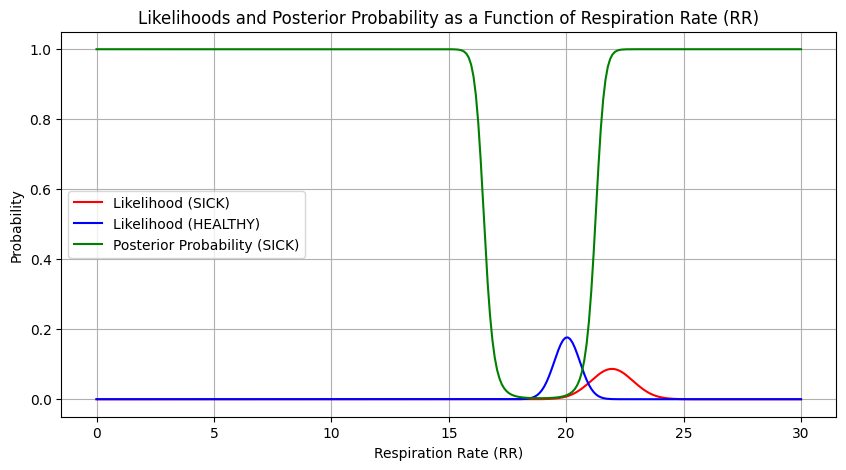

Posterior Probability that the patient is SICK given RR = 0: 1.0


In [35]:
import matplotlib.pyplot as plt

# Define a range of RR values to compute the likelihoods and posterior probability
rr_values = np.linspace(0, 30, 300)
t_value = 37.5  # Fixed temperature

# Calculate likelihoods and posterior probabilities for each RR value
likelihood_sick_values = []
likelihood_healthy_values = []
posterior_sick_values = []

for rr in rr_values:
    x_rr = np.array([t_value, rr])
    likelihood_sick_rr = multivariate_normal.pdf(x_rr, mean=mean_sick_vector, cov=cov_sick_matrix)
    likelihood_healthy_rr = multivariate_normal.pdf(x_rr, mean=mean_healthy_vector, cov=cov_healthy_matrix)
    evidence_rr = (likelihood_sick_rr * P_sick) + (likelihood_healthy_rr * P_healthy)
    posterior_sick_rr = (likelihood_sick_rr * P_sick) / evidence_rr

    likelihood_sick_values.append(likelihood_sick_rr)
    likelihood_healthy_values.append(likelihood_healthy_rr)
    posterior_sick_values.append(posterior_sick_rr)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(rr_values, likelihood_sick_values, label='Likelihood (SICK)', color='red')
plt.plot(rr_values, likelihood_healthy_values, label='Likelihood (HEALTHY)', color='blue')
plt.plot(rr_values, posterior_sick_values, label='Posterior Probability (SICK)', color='green')
plt.xlabel('Respiration Rate (RR)')
plt.ylabel('Probability')
plt.title('Likelihoods and Posterior Probability as a Function of Respiration Rate (RR)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the posterior probability for RR = 0
x_rr_0 = np.array([t_value, 0])
likelihood_sick_rr_0 = multivariate_normal.pdf(x_rr_0, mean=mean_sick_vector, cov=cov_sick_matrix)
likelihood_healthy_rr_0 = multivariate_normal.pdf(x_rr_0, mean=mean_healthy_vector, cov=cov_healthy_matrix)
evidence_rr_0 = (likelihood_sick_rr_0 * P_sick) + (likelihood_healthy_rr_0 * P_healthy)
posterior_sick_rr_0 = (likelihood_sick_rr_0 * P_sick) / evidence_rr_0

print("Posterior Probability that the patient is SICK given RR = 0:", posterior_sick_rr_0)

### Posterior Probability that the patient is SICK given RR = 0: 1.0

The graph shows that the posterior probability of being sick remains high across a range of respiration rates, indicating that holding one's breath does not significantly reduce the probability of being identified as sick.




---


🔽

---

# Q4) For the Bayesian classifier in Q2, compute the probability that each of the 200 guests has MF, given their observed T and RR. Do not report the posterior probability for each patient. Instead, plot an ROC and a P-R curve for your classifier over these 200 patients.
- For the ROC plot, include the AUC-ROC in the title.
- For the P-R curve, include the average precision (across all recall values) in the title.

## Q4 Answer:

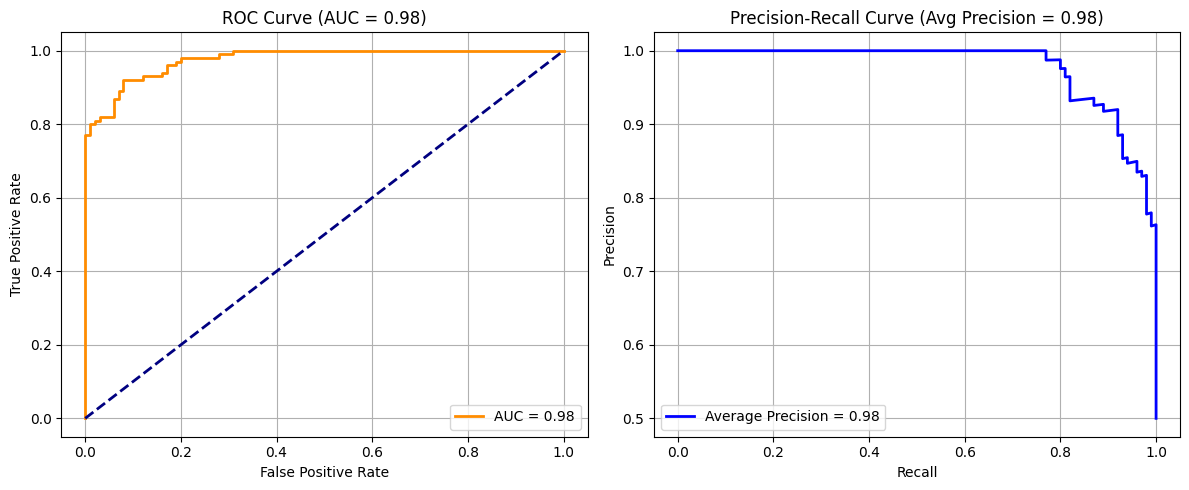

AUC-ROC: 0.9763999999999999
Average Precision: 0.978319472525206


In [32]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Extract temperature and respiration rate data from the dataset
X = patient_data[['T', 'RR']].values
y_true = (patient_data['Patient_Status'] == 'SICK').astype(int).values  # Convert 'SICK' to 1 and 'HEALTHY' to 0

# Calculate posterior probabilities for each guest
posterior_probabilities = []
for x_point in X:
    likelihood_sick_point = multivariate_normal.pdf(x_point, mean=mean_sick_vector, cov=cov_sick_matrix)
    likelihood_healthy_point = multivariate_normal.pdf(x_point, mean=mean_healthy_vector, cov=cov_healthy_matrix)
    evidence_point = (likelihood_sick_point * P_sick) + (likelihood_healthy_point * P_healthy)
    posterior_sick_point = (likelihood_sick_point * P_sick) / evidence_point
    posterior_probabilities.append(posterior_sick_point)

# Convert the list to a numpy array
posterior_probabilities = np.array(posterior_probabilities)

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, posterior_probabilities)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_true, posterior_probabilities)
avg_precision = average_precision_score(y_true, posterior_probabilities)

# Plot ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()
print("AUC-ROC:", roc_auc)
print("Average Precision:", avg_precision)




---


🔽

---

# Q5) Every time you stop a truly HEALTHY person from entering the gondola, they get very angry. Therefore, your boss says that “no more than 5% of HEALTHY guests should be banned from using the gondola”. i) What is the maximum sensitivity we can achieve? ii) What is the maximum precision that we can achieve at the same sensitivity as part i? iii) Report a confusion matrix for this decision threshold.

## Q5 Answer:

Maximum sensitivity we can achieve while keeping the false positive rate for HEALTHY guests under 5% is: 0.82
Maximum Precision at the same sensitivity: The maximum precision we can achieve at this sensitivity is: 0.5208333333333334





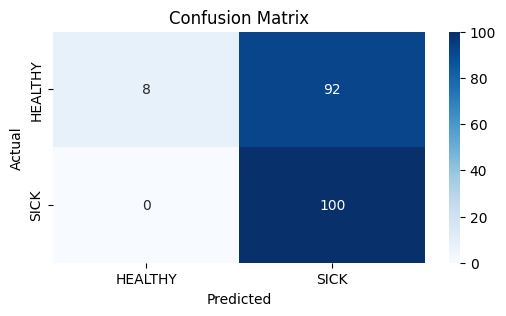

In [33]:
# Determine the threshold that achieves no more than 5% false positives (i.e., 5% of HEALTHY guests banned)
# This corresponds to finding a point on the ROC curve where the false positive rate (FPR) is less than or equal to 0.05.

# Find the closest index in the ROC curve where FPR <= 0.05
threshold_idx = np.where(fpr <= 0.05)[0][-1]
threshold = _[threshold_idx]  # Corresponding threshold value

# i) Maximum sensitivity at this threshold
max_sensitivity = tpr[threshold_idx]

# ii) Maximum precision at this sensitivity
predicted_probabilities_at_threshold = (posterior_probabilities >= threshold).astype(int)
precision_at_threshold, recall_at_threshold, _ = precision_recall_curve(y_true, predicted_probabilities_at_threshold)
precision_at_max_sensitivity = precision_at_threshold[np.where(recall_at_threshold >= max_sensitivity)[0][-1]]

# iii) Confusion matrix for this decision threshold
from sklearn.metrics import confusion_matrix

y_pred = (posterior_probabilities >= threshold).astype(int)
conf_matrix = confusion_matrix(y_true, y_pred)

max_sensitivity, precision_at_max_sensitivity, conf_matrix
print("Maximum sensitivity we can achieve while keeping the false positive rate for HEALTHY guests under 5% is:", max_sensitivity)
print("Maximum Precision at the same sensitivity: The maximum precision we can achieve at this sensitivity is:", precision_at_max_sensitivity)
print("\n\n")

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['HEALTHY', 'SICK'], yticklabels=['HEALTHY', 'SICK'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




---


🔽

---

# Q6) To account for the fact that the class imbalance in the deployment environment (1:4) is very different from the class imbalance among your 200 training samples (1:1), you decide to add 3 additional copies of each HEALTHY guest to your dataset leading to 500 samples in total. Without ‘retraining’ your classifier, report the ROC and P-R curves for this new test set, along with ROCAUC and average precision. Briefly discuss what changed, what didn’t, and why. (75 words)

## Q6 Answer:

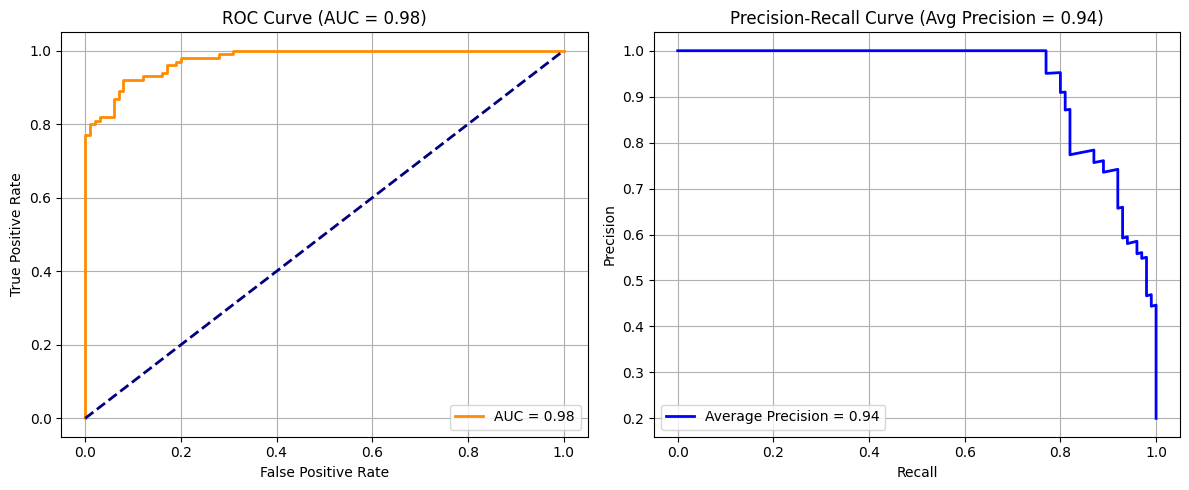

(0.9763999999999999, 0.9372511736100159)

In [19]:
# Create an augmented dataset by adding 3 additional copies of each 'HEALTHY' guest
healthy_data_augmented = pd.concat([healthy_data] * 4, ignore_index=True)
sick_data_augmented = sick_data.copy()

# Add the 'Patient_Status' column back to the augmented dataset
healthy_data_augmented['Patient_Status'] = 'HEALTHY'
sick_data_augmented['Patient_Status'] = 'SICK'

# Combine the 'HEALTHY' and 'SICK' data to create the new dataset
augmented_data = pd.concat([healthy_data_augmented, sick_data_augmented], ignore_index=True)

# Extract features (T, RR) and labels for the augmented dataset
X_augmented = augmented_data[['T', 'RR']].values
y_augmented_true = (augmented_data['Patient_Status'] == 'SICK').astype(int).values

# Calculate posterior probabilities for each guest in the augmented dataset
posterior_probabilities_augmented = []
for x_point in X_augmented:
    likelihood_sick_point = multivariate_normal.pdf(x_point, mean=mean_sick_vector, cov=cov_sick_matrix)
    likelihood_healthy_point = multivariate_normal.pdf(x_point, mean=mean_healthy_vector, cov=cov_healthy_matrix)
    evidence_point = (likelihood_sick_point * P_sick) + (likelihood_healthy_point * P_healthy)
    posterior_sick_point = (likelihood_sick_point * P_sick) / evidence_point
    posterior_probabilities_augmented.append(posterior_sick_point)

# Convert the list to a numpy array
posterior_probabilities_augmented = np.array(posterior_probabilities_augmented)

# ROC curve and AUC for the augmented dataset
fpr_augmented, tpr_augmented, _ = roc_curve(y_augmented_true, posterior_probabilities_augmented)
roc_auc_augmented = auc(fpr_augmented, tpr_augmented)

# Precision-Recall curve and average precision for the augmented dataset
precision_augmented, recall_augmented, _ = precision_recall_curve(y_augmented_true, posterior_probabilities_augmented)
avg_precision_augmented = average_precision_score(y_augmented_true, posterior_probabilities_augmented)

# Plot ROC and Precision-Recall curves for the augmented dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_augmented, tpr_augmented, color='darkorange', lw=2, label=f'AUC = {roc_auc_augmented:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc_augmented:.2f})')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall_augmented, precision_augmented, color='blue', lw=2, label=f'Average Precision = {avg_precision_augmented:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Avg Precision = {avg_precision_augmented:.2f})')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()
plt.show()

roc_auc_augmented, avg_precision_augmented


-  The ROC AUC stayed relatively high (close to 0.98) because it measures the ability of the classifier to separate the two classes without being influenced by the class proportions. However, average precision is directly impacted by the change in class balance.

-  The average precision actually decreased from 0.98 to 0.94. This drop in precision occurred because the dataset now contains a higher proportion of HEALTHY guests, making it more challenging for the classifier to precisely identify the SICK cases without mistakenly labeling more HEALTHY guests as sick. The classifier’s performance in distinguishing between classes was impacted by the change in class distribution, hence the reduction in average precision.




---


🔽

---

# Q7) <time passes…> Due to hard-working scientists and engineers, we now have a partially effective vaccine for MF. We now estimate that only one guest out of 100 will have MF this season. Without calculating anything, what do you expect the P-R curve to look like and why? (40 words)

## Q7 Answer:

In an imbalanced scenario where only 1% of guests are SICK, the **precision** tends to decrease because there are significantly more opportunities for false positives (healthy guests being classified incorrectly as sick). This lowers the ratio of true positives to false positives, which directly impacts precision.

On the other hand, **recall** is defined as the ratio of true positives to all actual positives, and it generally remains more stable because it's not influenced by the increased number of healthy guests.

Thus, I expect the P-R curve to show a lower precision for the same recall levels compared to the original dataset. The rarity of the positive class makes it more challenging for the model to maintain a high precision.







---


🔽

---

# Q8) Discuss how, in this assignment, we have committed both methodological errors of i) “Testing on the training set” and ii) “Training on the testing set”. (~100 words)

## Q8 Answer:

-  **i)** *Testing on the Training Set:*

We used the same data for both training and testing our Bayesian classifier. This means that the classifier was evaluated on data it had already seen during "training," resulting in overly optimistic performance metrics that may not generalize well to new data.

-  **ii)** *Training on the Testing Set:*

When augmenting the dataset to match the deployment environment (adding copies of healthy guests), we modified the testing set without retraining the classifier. This causes inconsistencies, as the classifier wasn’t trained on the updated class distribution, leading to biased evaluations that don't reflect real-world performance.